# Example 1: uniqueness with one single boundary condition
Here we show a graph where one single boundary condition is sufficient to
recover conductivities from power data in the linearized sense.

## Graph setup
First we setup the graph, boundary conditions and graph Laplacian

In [1]:
using Plots, LinearAlgebra, Test
x = vcat([cos(2π*i/3) for i=0:2],0)
y = vcat([sin(2π*i/3) for i=0:2],0)
∇ = [1 0 0 -1
     0 1 0 -1
     0 0 1 -1 ]
σ = ones(3);
𝐁 = [1,2,3];
𝐈 = [4];
n𝐈 =length(𝐈); n𝐁 = length(𝐁);
n𝐄, n𝐕 = size(∇)

f1 = [ 1, 0,0];
L(σ) = ∇'*diagm(σ)*∇;

## Graph plotting

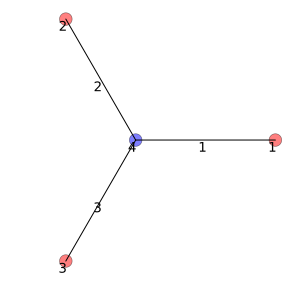

In [2]:
scatter(x[𝐈],y[𝐈], color="blue",markersize=7,markeralpha=0.5);
scatter!(x[𝐁],y[𝐁], color="red",markersize=7,markeralpha=0.5);
for i in eachindex(x)
  annotate!(x[i], y[i], text("$i",:black,:top,:right,9))
end
for (i, r) in enumerate(eachrow(∇))
  i1, i2 = findall(abs.(r) .> 0)
  plot!([x[i1], x[i2]], [y[i1], y[i2]], color="black", lw=1)
  annotate!((x[i1]+x[i2])/2, (y[i1]+y[i2])/2, text("$i", :black, :top,:right,9))
end
p=plot!(legend=:none, aspect_ratio=:equal, axis=false, grid=false,size=(300,300))

## Solve the Dirichlet problem

In [3]:
u1 = zeros(4)
u1[𝐁] = f1;
u1[𝐈] = -L(σ)[𝐈,𝐈]\(L(σ)[𝐈,𝐁]*f1)
@test u1[𝐈][1] ≈ 1/3

Test Passed

## Jacobian and injectivity test

In [4]:
R𝐈= I(n𝐕)[𝐈,:] # restriction to interior nodes
# Forward problem and Jacobian
ℒ(σ,u) = [ (L(σ)*u)[𝐈]; u[𝐁] ]
ℳ(σ,u) = σ .* (∇*u).^2
DℒDσ(σ,u) = [R𝐈*∇'*diagm(∇*u);zeros(n𝐁,n𝐄)]
DℒDu(σ,u) = [L(σ)[𝐈,:];I(n𝐕)[𝐁,:]]
DℳDσ(σ,u) = diagm((∇*u).^2)
DℳDu(σ,u) = diagm(2σ.*(∇*u))*∇
𝒜 = [ DℒDσ(σ,u1) DℒDu(σ,u1)
      DℳDσ(σ,u1) DℳDu(σ,u1) ]

@testset begin
  @test all(size(𝒜) .== (n𝐕+n𝐄,n𝐕+n𝐄))
end
println("Condition number of Jacobian is = ",cond(𝒜))

Test Summary: | Pass  Total  Time
test set      |    1      1  0.1s
Condition number of Jacobian is = 44.26237920125537


---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*